# Predicting which Canadian province will have the highest percentage of COVID-19 recoveries
### Group Members
Jason Ji (69217222), Mikayla Chau (29043288), Linda Zhang (95711800), Alireza Mohammadi (20700985)

In [2]:
set.seed(36)
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 15)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Intoduction

keeping columns: date, province, comfirmed, probable cases, deaths, total cases, percent today, percent recovered
predictors: date, comfirmed, probable cases, deaths, total cases, percent today



  COVID-19 is an infectious disease caused by SARS-CoV-2 virus (Government of Canada). The first known case was identified in Wuhan, China, on December 12th 2019 (CDC Museum Covid-19 Timeline). The disease quickly spread worldwide, resulting in the COVID-19 pandemic. The common symptoms of COVID-19 include fever, cough, headache, loss of smell and taste(Government of Canada). Canada is also severely impacted by COVID-19. According to the government of Canada, some people are at higher risk of more severe disease or outcomes from COVID-19 than others. Although there are a number of available vaccines and treatmentS, there are nearly 4,300,000 infected people by the end of September, 2022 . Ontario has the highest total number of infected people, that is nearly 1,470,000, however, the total number of infected people in Nunavut is just 3531. (Government of Canada) Because Yukon, Northwest Territory and Nunavut are three provinces that are close to the Arctic Circle, there are not as many people living there as other 10 provinces, which causes a huge difference in the number of the total infected people. Also, it is hard to predict the accurate number of the recovered people. In addition to the data of the total number of infected people, the recovery of infection is different for 13 provinces in Canada. Doing predictions for recoveries can give more suggestions than just focusing on the total numbers of infected people. For these three reasons, we want to focus on the rate of recovery of COVID-19,and want to predict which province has the largest percentage. 

  In this project, we will try to predict which Canadian province will have the highest percentage of COVID-19 recoveries in December 2022. In order to do so we will investigate public health information gathered from different Canadian territories since the start of the pandemic. 

  The dataset we work on in this project is taken from https://health-infobase.canada.ca/ (health info base of Government of Canada) based on data that provincial and territorial partners published on cases and deaths. This data contains daily information of COVID-19 cases from February 2020 until October 2022. There are 7 important properties for each data report:

1. province : Canada province/territory (P/T) from which the information was reported, containing names of 14 Canadian territories.
2. date : Date reported by P/T
3. numconf : Number of confirmed cases in each P/T (Canada= sum of all P/T)
4. numprob : Number of probable cases in each P/T (Canada= sum of all P/T)
5. numdeaths : Number of deaths in each P/T (Canada= sum of all P/T)
6. numtotal : Total number of cases, calculated by number of confirmed cases plus number of probable cases.
7. Percentrecover : Percentage of recovered cases, Calculated by the number of recovered cases for P/T divided by the total number of confirmed cases for that P/T [(numrecover/numtotal) * 100]

As of October 21, 2022, 9 am ET,Public Health Agency of Canada(PHAC) has received detailed case report data on 4,135,488 cases.



Source:
Public Health Agency of. “Government of Canada.” Canada.ca, Government of Canada, 18 Aug. 2022, https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html
“CDC Museum Covid-19 Timeline.” David J. Sencer CDC Museum: In Association with the Smithsonian Institution, Centers for Disease Control and Prevention, 16 Aug. 2022, https://www.cdc.gov/museum/timeline/covid19.html. 

### Preliminary Data Analysis

The data is mostly tidy, however there are many columns we do not need for our analysis. Tidying the data included taking out these unwanted columns, any unwanted rows (Canada and Repatriated Travellers), and changing some column names to make it more reader-friendly. 

In [3]:
covid <- read_csv("canada-covid-19.csv")
covid

Rows: 9762 Columns: 40
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): prname, prnameFR, percentrecover
dbl  (36): pruid, update, numconf, numprob, numdeaths, numtotal, numtested, ...
date  (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,⋯,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered
<dbl>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
35,Ontario,Ontario,2020-01-31,NA,3,0,0,3,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
59,British Columbia,Colombie-Britannique,2020-01-31,NA,1,0,0,1,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
1,Canada,Canada,2020-01-31,NA,4,0,0,4,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
35,Ontario,Ontario,2020-02-08,NA,3,0,0,3,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
59,British Columbia,Colombie-Britannique,2020-02-08,NA,4,0,0,4,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
1,Canada,Canada,2020-02-08,NA,7,0,0,7,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
35,Ontario,Ontario,2020-02-16,NA,3,0,0,3,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
59,British Columbia,Colombie-Britannique,2020-02-16,NA,5,0,0,5,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


In [4]:
tidy_covid <- covid |> 
    mutate(province = prname) |>
    mutate(percentrecover = as.numeric(percentrecover)) |>
    select(province, date, numconf, numprob, numdeaths, numtotal, percentrecover) |>
    filter(province != "Repatriated travellers") |>
    filter(province != "Canada") |>
    group_by(province)
tidy_covid

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


province,date,numconf,numprob,numdeaths,numtotal,percentrecover
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ontario,2020-01-31,3,0,0,3,NA
British Columbia,2020-01-31,1,0,0,1,NA
Ontario,2020-02-08,3,0,0,3,NA
British Columbia,2020-02-08,4,0,0,4,NA
Ontario,2020-02-16,3,0,0,3,NA
British Columbia,2020-02-16,5,0,0,5,NA
Ontario,2020-02-21,3,0,0,3,NA
British Columbia,2020-02-21,6,0,0,6,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮


In [5]:
covid_split <- initial_split(tidy_covid, prop = 0.75, strata = province)
covid_train <- training(covid_split)
covid_test <- testing(covid_split)
covid_train
covid_test

Warning message:
“Too little data to stratify.
• Resampling will be unstratified.”


province,date,numconf,numprob,numdeaths,numtotal,percentrecover
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ontario,2020-01-31,3,0,0,3,NA
British Columbia,2020-01-31,1,0,0,1,NA
Ontario,2020-02-16,3,0,0,3,NA
Ontario,2020-02-21,3,0,0,3,NA
British Columbia,2020-02-21,6,0,0,6,NA
Ontario,2020-02-25,4,0,0,4,NA
British Columbia,2020-02-25,7,0,0,7,NA
Ontario,2020-02-26,5,0,0,5,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮


province,date,numconf,numprob,numdeaths,numtotal,percentrecover
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ontario,2020-02-08,3,0,0,3,NA
British Columbia,2020-02-08,4,0,0,4,NA
British Columbia,2020-02-16,5,0,0,5,NA
Ontario,2020-02-24,4,0,0,4,NA
British Columbia,2020-02-24,6,0,0,6,NA
Ontario,2020-02-27,6,0,0,6,NA
Ontario,2020-02-29,8,0,0,8,NA
Ontario,2020-03-01,15,0,0,15,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮


Summary Tables

In [6]:
obs_num_summary <- group_by(covid_train, province)%>%
                            summarize( 
                             min_conf = min(numconf, na.rm = TRUE),
                             mean_conf = mean(numconf,na.rm = TRUE),
                             most_conf = max(numconf, na.rm = TRUE),
                             min_death = min(numdeaths, na.rm = TRUE),
                             mean_death = mean(numdeaths,na.rm = TRUE),
                             most_death = max(numdeaths, na.rm = TRUE),
                             min_total = min(numtotal, na.rm = TRUE),
                             mean_death = mean(numtotal,na.rm = TRUE),
                             most_total = max(numtotal, na.rm = TRUE),
                             )
obs_num_summary

province,min_conf,mean_conf,most_conf,min_death,mean_death,most_death,min_total,most_total
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alberta,14,130984.1076,341023,0,130976.3566,3286,14,341023
British Columbia,1,78322.5764,225785,0,78322.5764,2399,1,225785
Manitoba,0,28092.2475,70539,0,28095.1724,1359,0,70539
New Brunswick,0,1689.8403,9973,0,1689.9139,144,0,9973
Newfoundland and Labrador,0,828.4609,2152,0,828.4835,18,0,2152
Northwest Territories,0,272.9243,2082,0,272.9243,12,0,2082
Nova Scotia,0,2963.5144,9202,0,2963.5823,110,0,9202
Nunavut,0,310.0397,676,0,310.0397,4,0,676
Ontario,3,270338.0020,642465,0,270338.0020,10107,3,642465


In [7]:
province_obs <- group_by(covid_train,province)%>%
summarize(num_obs=n())
province_obs

province,num_obs
<chr>,<int>
Alberta,502
British Columbia,484
Manitoba,493
New Brunswick,476
Newfoundland and Labrador,486
Northwest Territories,502
Nova Scotia,486
Nunavut,479
Ontario,495


In [8]:
missing <- covid_train %>% summarise_all(~ sum(is.na(.)))
missing

province,date,numconf,numprob,numdeaths,numtotal,percentrecover
<chr>,<int>,<int>,<int>,<int>,<int>,<int>
Alberta,0,0,181,0,0,22
British Columbia,0,0,164,0,0,23
Manitoba,0,0,177,0,0,23
New Brunswick,0,0,167,0,0,22
Newfoundland and Labrador,0,0,170,0,0,20
Northwest Territories,0,0,182,0,0,28
Nova Scotia,0,0,166,0,0,21
Nunavut,0,0,170,0,0,180
Ontario,0,0,166,0,0,30


Visualization

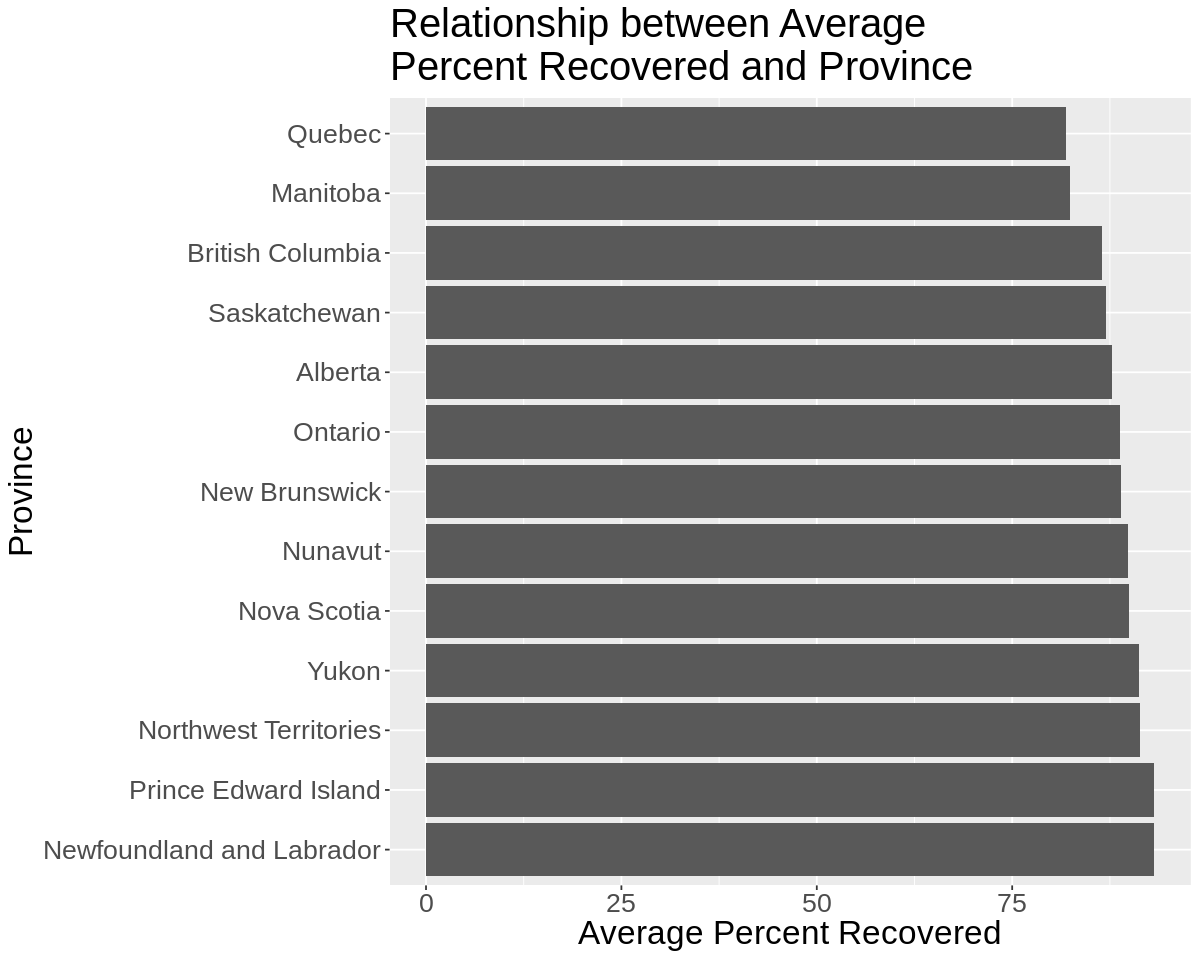

In [53]:
options(repr.plot.width = 10, repr.plot.height = 8)
recover_table <- covid_train |> 
    mutate(mean_percent = mean(percentrecover, na.rm = TRUE)) |>
    select(province, mean_percent) |>
    group_by(province) |>
    summarize(mean_percent = mean(mean_percent)) 
    
recover_plot <- recover_table |>
ggplot(aes(x = fct_reorder(province, mean_percent, .desc = TRUE), y = mean_percent)) +
        geom_bar(stat = "identity")+
        labs(x = "Province", y = "Average Percent Recovered", fill = "Province")+
        theme(text = element_text(size = 20))+
        coord_flip()+
    ggtitle("Relationship between Average \nPercent Recovered and Province")
recover_plot